## Observations and Insights

- The two most promising drugs in the study are Capomulin and Ramicane, which have average tumor sizes of 40.68 mm^3 and 40.22 mm^3 respectively.  As a next step, the percent change in tumor volume might also be a useful parameter to look at.  For each drug, the final tumor volumes per mouse were analyzed.  No outliers were found for either drug.  This is surprising because the final tumor volume was included for all mice, even those that died before the final 45 day timepoint.  It was expected that those mice that perished early would result in final tumor volumes that were outliers on the upper boundaries.  It might be worth investigating common practices in animal studies to determine whether animals that died early in the study should be included in the final data.  Is there a threshold (time) that they must cross to be included in the study?



- The total number of mice used in the study was 249, of which, 125 were male and 124 were female.  As a next step, it might be useful to look at the male/female distribution of mice per drug regimen.  Do regimens that are weighted more heavily toward male or female mice perform better or worse in the study.  For the most successful drugs in the study, is the percent change in the tumor size significantly greater for male versus female mice?



- The two most successful drug regimens (Capomulin and Ramicane) also had the most number of total data points.  The remaining drug regimens all had roughly the same number of points, and this may be attributed to some mice dying early.

## Dependencies and starter code

In [149]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [152]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [21]:
study_results_complete=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="inner")
study_results_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#see how many drug regimens existed
drug_regimens=study_results_complete["Drug Regimen"].unique()
#group the data according to drug regimen
grouped_results_regimen=study_results_complete.groupby("Drug Regimen")
#calculate the mean value of tumor size using these results
mean_tumor_size=grouped_results_regimen["Tumor Volume (mm3)"].mean()
#calculate the median value of tumor size using these results
median_tumor_size=grouped_results_regimen["Tumor Volume (mm3)"].median()
#calculate the variance of the tumor size 
variance_tumor_size=grouped_results_regimen["Tumor Volume (mm3)"].var()
#calculate the standard deviation of the tumor size 
stdev_tumor_size=grouped_results_regimen["Tumor Volume (mm3)"].std()
#calculate the SEM of the tumor volume
sem_tumor_size=grouped_results_regimen["Tumor Volume (mm3)"].sem()


In [601]:
#combine the information above into a dataframe

#merge mean and median information
summary_one=pd.merge(mean_tumor_size,median_tumor_size,on="Drug Regimen",how="inner")
#reset index so that drug regimen becomes a column, then rename columns
summary_two=summary_one.reset_index()
summary_two=summary_two.rename(columns={"Tumor Volume (mm3)_x":"Average Tumor Volume (mm3)","Tumor Volume (mm3)_y":"Median Tumor Volume (mm3)"})
#merge variance and standard deviation information
summary_three=pd.merge(variance_tumor_size,stdev_tumor_size,on="Drug Regimen",how="inner")
#reset index so that drug regimen becomes a column, then rename columns
summary_three.reset_index()
summary_four=summary_two.rename(columns={"Tumor Volume (mm3)_x":"Variance of Tumor Volume (mm3)","Tumor Volume (mm3)_y":"Standard Deviation of Tumor Volume (mm3)"})
#merge df containing mean, median, stdev, variance
summary_five=pd.merge(summary_two,summary_four,on="Drug Regimen",how="inner")
#Finally, create a dataframe for the SEM values and merge that to form the final table
summary_six=pd.DataFrame(sem_tumor_size)
summary_six.reset_index().rename(columns={"Tumor Volume (mm3)":"SEM of Tumor Volume (mm3)"})
summary_table=pd.merge(summary_five,summary_six,on="Drug Regimen",how="inner").rename(columns={"Average Tumor Volume (mm3)_x":
                                                                                              "Average Tumor Volume (mm3)",
                                                                                              "Median Tumor Volume (mm3)_x":
                                                                                              "Median Tumor Volume (mm3)",
                                                                                              "Average Tumor Volume (mm3)_y":
                                                                                              "Average Tumor Volume (mm3)",
                                                                                              "Median Tumor Volume (mm3)_y":
                                                                                              "Median Tumor Volume (mm3)"})
#set the Drug Regimen as the index value
summary_table.set_index("Drug Regimen")


,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Average Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,40.675741,41.557809,0.329346
Ceftamin,52.591172,51.776157,52.591172,51.776157,0.469821
Infubinol,52.884795,51.820584,52.884795,51.820584,0.492236
Ketapril,55.235638,53.698743,55.235638,53.698743,0.603860
Naftisol,54.331565,52.509285,54.331565,52.509285,0.596466
Placebo,54.033581,52.288934,54.033581,52.288934,0.581331
Propriva,52.322552,50.854632,52.322552,50.854632,0.512884
Ramicane,40.216745,40.673236,40.216745,40.673236,0.320955
Stelasyn,54.233149,52.431737,54.233149,52.431737,0.573111


## Bar plots

In [156]:
#Calculate the number of points
number_points_regimen=grouped_results_regimen["Mouse ID"].count()
number_points_regimen_df=pd.DataFrame(number_points_regimen).rename(columns={"Mouse ID":"Total Data Points"})
number_points_regimen_df

,Total Data Points
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


(0, 250)

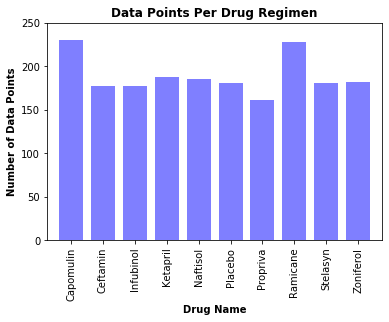

In [182]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapoints_regimen=number_points_regimen_df.plot(kind="bar",color='b',alpha=0.5,width=0.75)
datapoints_regimen.set_xlabel("Drug Name",weight="bold")
datapoints_regimen.set_ylabel("Number of Data Points",weight="bold")
datapoints_regimen.set_title("Data Points Per Drug Regimen",weight="bold")
datapoints_regimen.get_legend().remove()
datapoints_regimen.set_xlim(-0.75,len(x_axis)-0.25)
datapoints_regimen.set_ylim(0,max(number_points_series)+20)

In [158]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#x-axis categories
number_points_drugs=number_points_regimen_df.reset_index()
drug_names=number_points_drugs["Drug Regimen"]
#y-axis values
number_points_series=pd.Series(number_points_regimen)
#determine the length of the x-axis
x_axis = np.arange(len(number_points_series))

(0, 250)

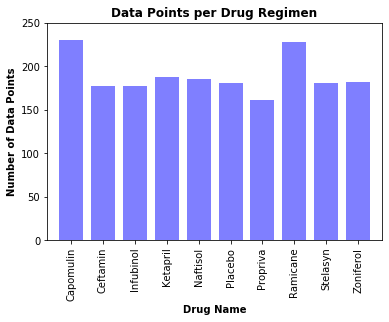

In [180]:
number_points_bar=plt.bar(x_axis,number_points_series,color='b',alpha=0.5,align="center",width=0.75)
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,drug_names,rotation=90);
plt.xlabel("Drug Name",weight="bold");
plt.ylabel("Number of Data Points",weight="bold");
plt.title("Data Points per Drug Regimen",weight="bold");
plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0,max(number_points_series)+20)
#EXAMPLE:plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(8,12));


## Pie plots

In [17]:
mouse_data_grouped=mouse_metadata.groupby("Sex")
male_female_counts=mouse_data_grouped["Mouse ID"].count()
male_female_counts_df=pd.DataFrame(male_female)
male_female_counts_df
#total_mice=len(study_results_complete["Mouse ID"].unique())
#grouped_sex=study_results_unique_mouse.groupby("Sex")
#male_female_counts=grouped_sex["Mouse ID"].count()
#male_female_counts
#male_female_counts_df=pd.DataFrame(male_female_counts)
#male_female_counts_df


,Mouse ID
Sex,
Female,124
Male,125


In [22]:
#set parameters for the pie plot
numbers=[125,124]
labels=["Male","Female"]
colors=["lightblue","pink"]
explode=(0.1,0)

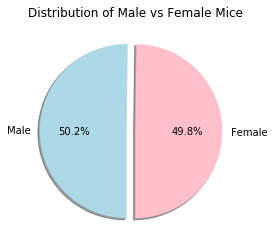

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#datapoints_regimen=number_points_regimen_df.plot(kind="bar",color='b',alpha=0.5,width=0.75)
male_female_pie=male_female_counts_df.plot.pie(y="Mouse ID",explode=(0,0.1),legend=False,autopct = "%.1f%%",
                                               startangle=270,colors=["pink","lightblue"],shadow=True)
male_female_pie.axes.get_yaxis().set_visible(False)
male_female_pie.set_title("Distribution of Male vs Female Mice");

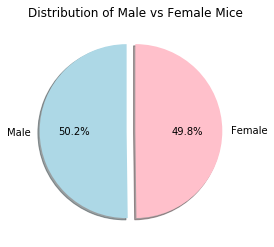

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(numbers,explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=90);
plt.title("Distribution of Male vs Female Mice");


## Quartiles, outliers and boxplots

**Note:  Final boxplot containing all four drug regimens is shown below the individual analysis for the the drugs**

# Capomulin

In [578]:
#answering the question:  Did all the mice last 45 days?  Answer is NO!!
capomulin=study_results_complete.loc[(study_results_complete["Drug Regimen"]=="Capomulin")]

#counts are different
capomulin_grouped=capomulin.groupby("Timepoint")
time_counts=capomulin_grouped["Mouse ID"].count()

#capomulin.head(30)

In [552]:
#Group the capomulin data by Mouse ID
capomulin_mouse_grouped=capomulin.groupby("Mouse ID")
#calculate the max timepoint, index is mouse ID, and column value is max timepoint
max_tp_capomulin=capomulin_mouse_grouped["Timepoint"].max()

In [577]:
tumor_size= pd.DataFrame()

for idx in max_tp_capomulin.index:
    tumor_row=capomulin.loc[(capomulin["Mouse ID"]==idx)&(capomulin["Timepoint"]==max_tp_capomulin[idx])]
    tumor_size = tumor_size.append(pd.DataFrame(tumor_row["Tumor Volume (mm3)"]))

#tumor_size

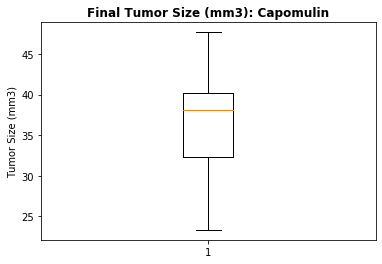

In [606]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size (mm3): Capomulin',weight="bold")
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(tumor_size["Tumor Volume (mm3)"])
plt.show()



In [625]:
#If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumor_size["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
                   

The lower quartile of tumor size is: 32.37735684
The upper quartile of tumor size is: 40.1592203
The interquartile range of tumor size is: 7.781863460000004
The the median of tumor size is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [629]:
tumor_size_sorted=tumor_size["Tumor Volume (mm3)"].sort_values(ascending=False)
capomulin_outliers=tumor_size.loc[(tumor_size["Tumor Volume (mm3)"]<lower_bound)|(tumor_size["Tumor Volume (mm3)"]>upper_bound)]
#capomulin_outliers
#capomulin_tumor_sorted


# Ramicane

In [582]:
#isolate all of the data for the drug Ramicane
ramicane=study_results_complete.loc[(study_results_complete["Drug Regimen"]=="Ramicane")]
#Group the Ramicane data by Mouse ID
ramicane_mouse_grouped=ramicane.groupby("Mouse ID")
#calculate the max timepoint, index is mouse ID, and column value is max timepoint
max_tp_ramicane=ramicane_mouse_grouped["Timepoint"].max()
#ramicane.head()
#max_tp_ramicane

In [591]:
ramicane_tumor= pd.DataFrame()

for idx in max_tp_ramicane.index:
    tumor_row=ramicane.loc[(ramicane["Mouse ID"]==idx)&(ramicane["Timepoint"]==max_tp_ramicane[idx])]
    ramicane_tumor = ramicane_tumor.append(pd.DataFrame(tumor_row["Tumor Volume (mm3)"]))

#ramicane_tumor.head()


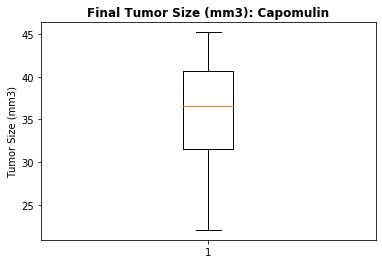

In [590]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#ramicane_data=ramicane_tumor
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size (mm3): Capomulin',weight="bold")
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(ramicane_tumor["Tumor Volume (mm3)"])
plt.show()

In [622]:
#If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ramicane_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
                   

The lower quartile of tumor size is: 31.56046955
The upper quartile of tumor size is: 40.65900627
The interquartile range of tumor size is: 9.098536719999998
The the median of tumor size is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [624]:
ramicane_tumor_sorted=ramicane_tumor["Tumor Volume (mm3)"].sort_values(ascending=False)
ramicane_outliers=ramicane_tumor.loc[(ramicane_tumor["Tumor Volume (mm3)"]<lower_bound)|(ramicane_tumor["Tumor Volume (mm3)"]>upper_bound)]
#ramicane_outliers
#ramicane_tumor_sorted


# Propriva

In [596]:
#isolate all of the data for the drug Propriva
propriva=study_results_complete.loc[(study_results_complete["Drug Regimen"]=="Propriva")]
#Group the Propriva data by Mouse ID
propriva_mouse_grouped=propriva.groupby("Mouse ID")
#calculate the max timepoint, index is mouse ID, and column value is max timepoint
max_tp_propriva=propriva_mouse_grouped["Timepoint"].max()
#propriva.head()
#max_tp_propriva

In [599]:
propriva_tumor= pd.DataFrame()

for idx in max_tp_propriva.index:
    tumor_row=propriva.loc[(propriva["Mouse ID"]==idx)&(propriva["Timepoint"]==max_tp_propriva[idx])]
    propriva_tumor = propriva_tumor.append(pd.DataFrame(tumor_row["Tumor Volume (mm3)"]))

#propriva_tumor.head()


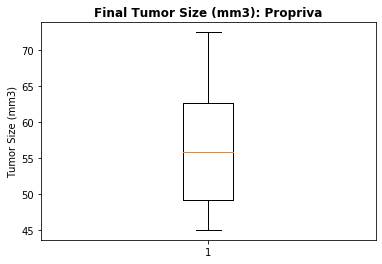

In [600]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#propriva_data=propriva_tumor
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size (mm3): Propriva',weight="bold")
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(propriva_tumor["Tumor Volume (mm3)"])
plt.show()

In [616]:
#If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = propriva_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor size is: 49.12296898
The upper quartile of tumor size is: 62.57087961
The interquartile range of tumor size is: 13.447910629999996
The the median of tumor size is: 55.84141007 
Values below 28.95110303500001 could be outliers.
Values above 82.742745555 could be outliers.


In [621]:
propriva_tumor_sorted=propriva_tumor["Tumor Volume (mm3)"].sort_values(ascending=False)
propriva_outliers=propriva_tumor.loc[(propriva_tumor["Tumor Volume (mm3)"]<lower_bound)|(propriva_tumor["Tumor Volume (mm3)"]>upper_bound)]
#ceftamin_outliers
#ceftamin_tumor_sorted


# Ceftamin

In [603]:
#isolate all of the data for the drug ceftamin
ceftamin=study_results_complete.loc[(study_results_complete["Drug Regimen"]=="Ceftamin")]
#Group the ceftamin data by Mouse ID
ceftamin_mouse_grouped=ceftamin.groupby("Mouse ID")
#calculate the max timepoint, index is mouse ID, and column value is max timepoint
max_tp_ceftamin=ceftamin_mouse_grouped["Timepoint"].max()
#ceftamin.head()
#max_tp_ceftamin

In [604]:
ceftamin_tumor= pd.DataFrame()

for idx in max_tp_ceftamin.index:
    tumor_row=ceftamin.loc[(ceftamin["Mouse ID"]==idx)&(ceftamin["Timepoint"]==max_tp_ceftamin[idx])]
    ceftamin_tumor = ceftamin_tumor.append(pd.DataFrame(tumor_row["Tumor Volume (mm3)"]))

#ceftamin_tumor.head()

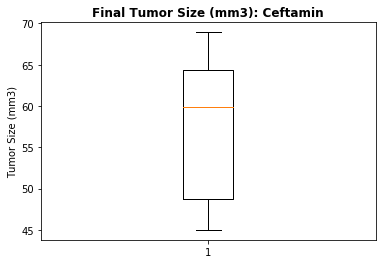

In [605]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#ceftamin_data=propriva_tumor
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size (mm3): Ceftamin',weight="bold")
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(ceftamin_tumor["Tumor Volume (mm3)"])
plt.show()

In [609]:
#If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ceftamin_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [615]:
ceftamin_tumor_sorted=ceftamin_tumor["Tumor Volume (mm3)"].sort_values(ascending=False)
ceftamin_outliers=ceftamin_tumor.loc[(ceftamin_tumor["Tumor Volume (mm3)"]<lower_bound)|(ceftamin_tumor["Tumor Volume (mm3)"]>upper_bound)]
#ceftamin_outliers
#ceftamin_tumor_sorted


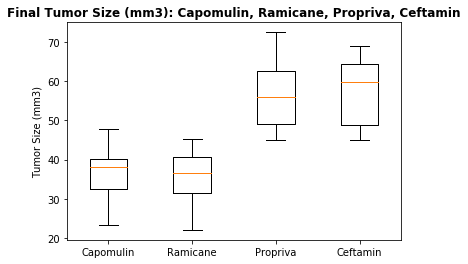

In [633]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size (mm3): Capomulin, Ramicane, Propriva, Ceftamin',weight="bold")
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot([tumor_size["Tumor Volume (mm3)"],ramicane_tumor["Tumor Volume (mm3)"],propriva_tumor["Tumor Volume (mm3)"],ceftamin_tumor["Tumor Volume (mm3)"]])
plt.xticks([1, 2, 3,4], ['Capomulin', 'Ramicane', 'Propriva','Ceftamin'])

plt.show()


## Line and scatter plots

In [359]:
#isolate data for specific drug (Capomulin) and specific mouse (s185)
capomulin_mouse=study_results_complete.loc[(study_results_complete["Drug Regimen"]=="Capomulin")&(study_results_complete["Mouse ID"]=="s185")]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


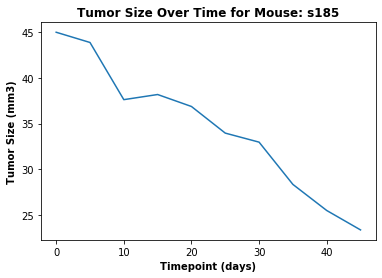

In [360]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timepoint_x=capomulin_mouse["Timepoint"]
tumorsize_y=capomulin_mouse["Tumor Volume (mm3)"]
plt.plot(timepoint_x,tumorsize_y);
plt.xlabel("Timepoint (days)",weight="bold");
plt.ylabel("Tumor Size (mm3)",weight="bold");
plt.title("Tumor Size Over Time for Mouse: s185",weight="bold");

In [405]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
%matplotlib inline
from scipy.stats import linregress

In [406]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#group capomulin datafram by mouse id 
mouse_grouped=capomulin.groupby("Mouse ID")
#create a series for the weight of each mouse
mouse_weight=mouse_grouped["Weight (g)"].mean()
#create a series for the average tumor volume of each mouse
avg_tumor=mouse_grouped["Tumor Volume (mm3)"].mean()

#Calculate the linear regression values to be plotted against weight
#(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor)
#regress_values = mouse_weight * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.8419363424694718
y = 0.95x + 21.55


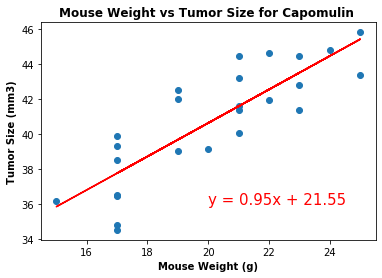

In [407]:
#Generate a scatter plot
plt.scatter(mouse_weight,avg_tumor,marker="o");
plt.xlabel("Mouse Weight (g)",weight="bold");
plt.ylabel("Tumor Size (mm3)",weight="bold");
plt.title("Mouse Weight vs Tumor Size for Capomulin ",weight="bold");

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Calculate the linear regression values to be plotted against weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the regression values to form the regression line
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red");

print(f"The r-squared is: {rvalue}")
print(line_eq)